In [ ]:
!pip install catboost

#CatBoost is a gradient boosting library , designed for high-performance and handling categorical features natively.
#It excels in speed, accuracy, and reducing overfitting in machine learning tasks.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from catboost import CatBoostClassifier

NLTK - Natural language Toolkit

In [ ]:
# Download stopwords if not already
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Loading Dataset

In [ ]:
file_path = '/content/dataset.csv'
df=pd.read_csv(file_path)
display(df)

,post_id,source,user_id,text,label
0,1813830459,Twitter,@meera98,night messyyy while heavy and stayed up late t...,Sad/Depressed
1,6900628131,Twitter,@devika9,"sleep exam but blue,made tea and stared out th...",Sad/Depressed
2,6675564164,Twitter,@aisha_sethi,"@ShrutiSethi, relationshipiiii schoollll,lowww...",Sad/Depressed
3,7884381010,Twitter,@ritu5,feeling empty. emptyyyyyy while listened to a ...,Sad/Depressed
4,2021823679,Twitter,@kabir27,"deadline empty,drained but got a text that did...",Sad/Depressed
...,...,...,...,...,...
19995,9032918170,Reddit,u/rehan_mehta84,"Handled routine tasks, moved a few things off ...",Neutral
19996,9456965472,Reddit,u/ritusethi,"I folded laundry, ð updated a spreadsheet a...",Neutral
19997,5285351880,Reddit,u/sohailmehta,"Today was ordinary â meetings, a quick lunch...",Neutral
19998,3477661249,Reddit,u/vivek_sethi220,"Handled routine tasks, moved a few things off ...",Neutral


Cleaning the text data

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)       # remove mentions
    text = re.sub(r'http\S+|www\S+', '', text)       # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)             # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()         # remove extra spaces

    tokens = [word for word in text.split() if word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

df['clean_text'] = df['text'].apply(clean_text)

Label Distribution Chart

/tmp/ipython-input-1400206177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')


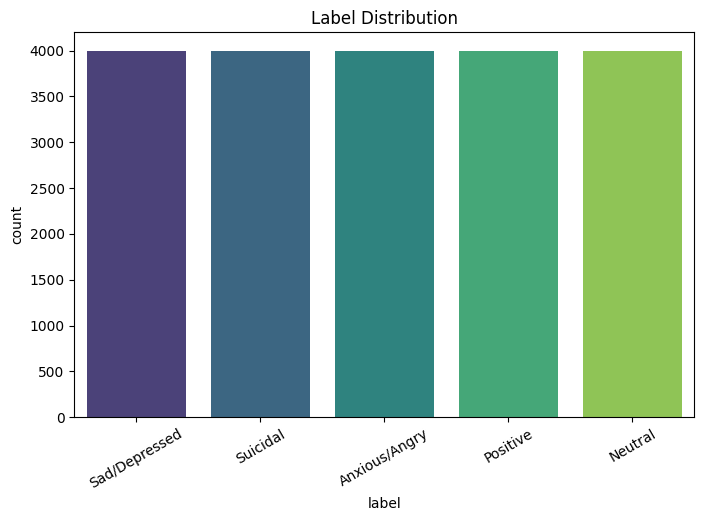

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title('Label Distribution')
plt.xticks(rotation=30)
plt.show()

Avg Post Length - Chart

/tmp/ipython-input-2930437616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='label', y='text_len', estimator='mean', palette='coolwarm')


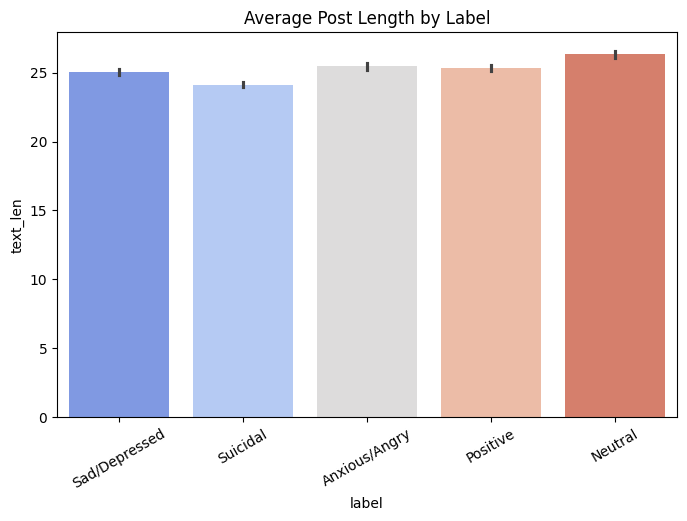

In [ ]:
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='label', y='text_len', estimator='mean', palette='coolwarm')
plt.title('Average Post Length by Label')
plt.xticks(rotation=30)
plt.show()

Word Clouds

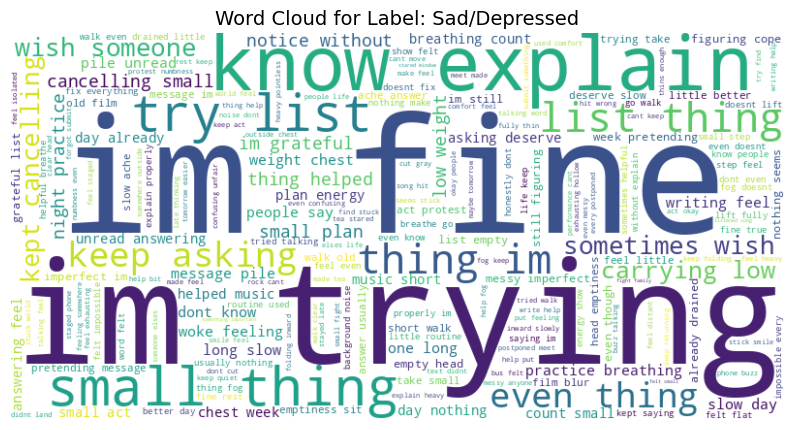

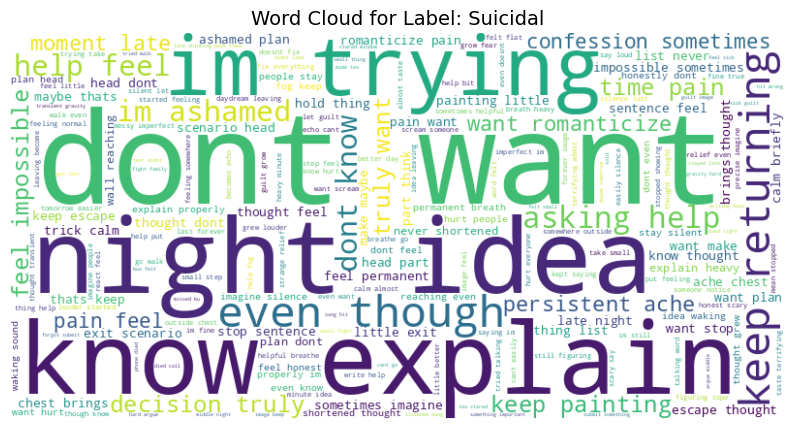

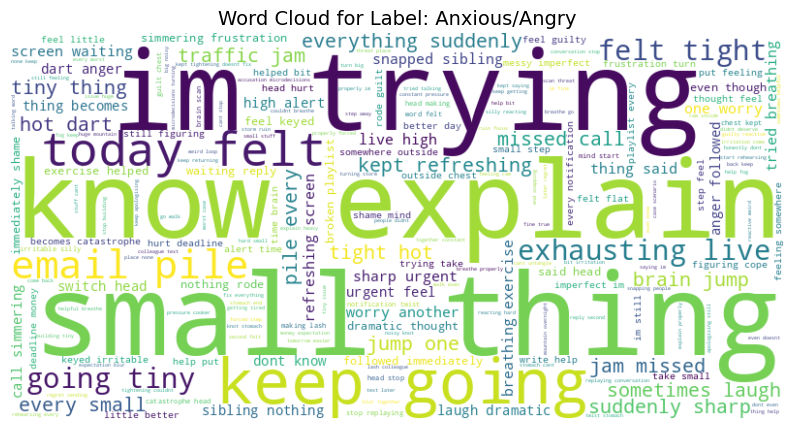

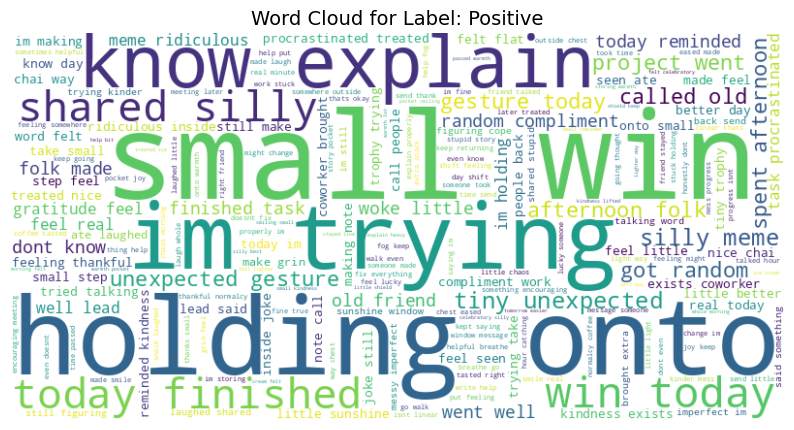

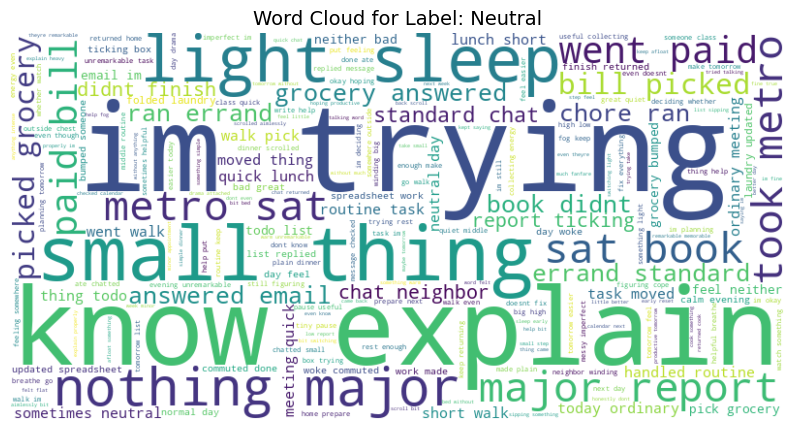

In [ ]:
labels = df['label'].unique()
for label in labels:
    text_data = ' '.join(df[df['label'] == label]['clean_text'])
    wordcloud = WordCloud(
        stopwords=STOPWORDS.union(stop_words),
        background_color='white',
        colormap='viridis',
        max_words=200,
        width=800,
        height=400
    ).generate(text_data)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}', fontsize=14)
    plt.show()

Word Frequency  - TOP 15 for each label

/tmp/ipython-input-310227301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='magma')


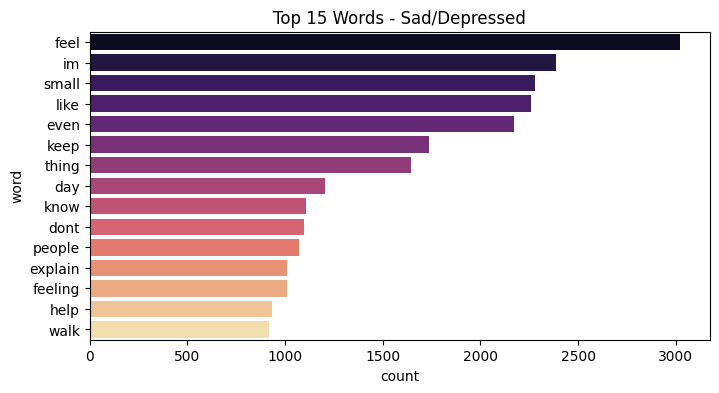

/tmp/ipython-input-310227301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='magma')


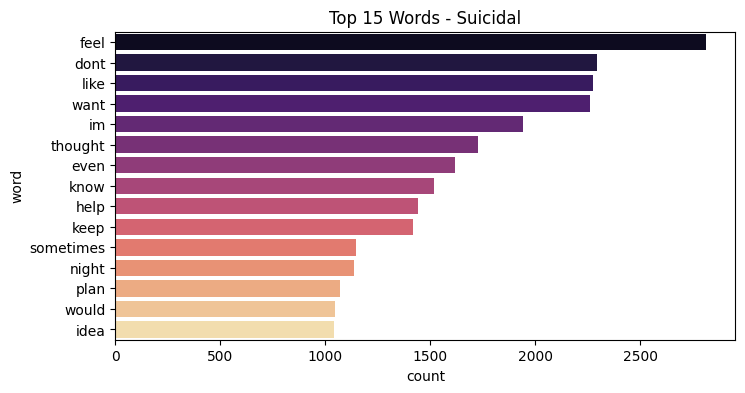

/tmp/ipython-input-310227301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='magma')


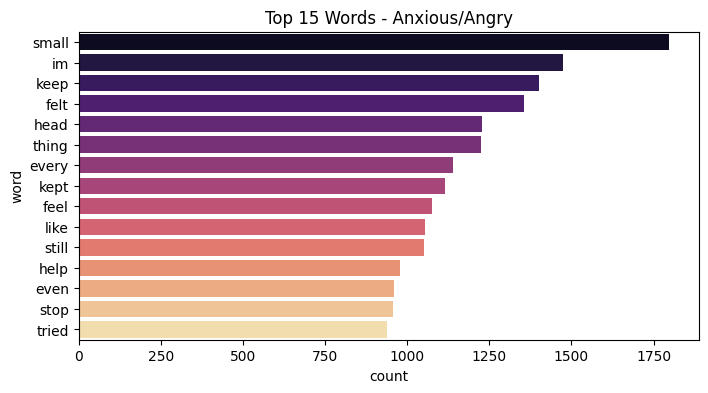

/tmp/ipython-input-310227301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='magma')


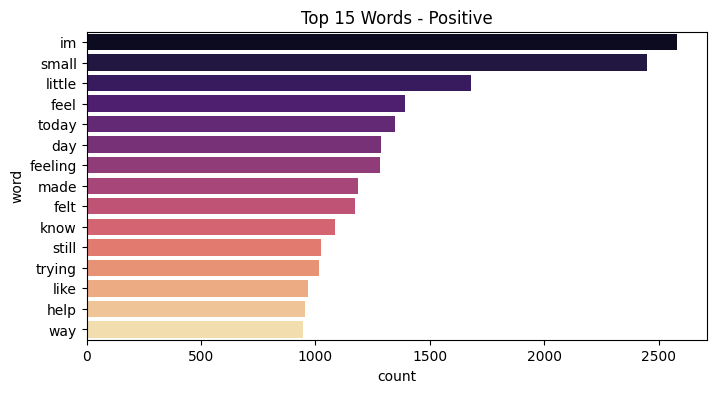

/tmp/ipython-input-310227301.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='magma')


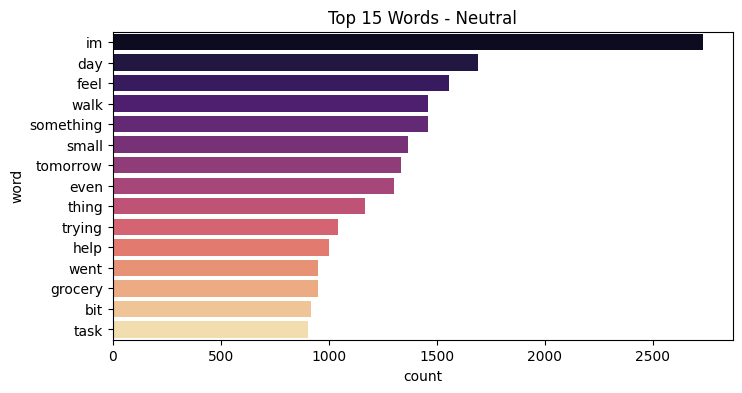

In [ ]:
from collections import Counter
for label in labels:
    words = ' '.join(df[df['label']==label]['clean_text']).split()
    freq = Counter(words).most_common(15)
    words_df = pd.DataFrame(freq, columns=['word', 'count'])
    plt.figure(figsize=(8,4))
    sns.barplot(data=words_df, x='count', y='word', palette='magma')
    plt.title(f'Top 15 Words - {label}')
    plt.show()

Feature and target

In [ ]:
X = df['clean_text']
y = df['label']

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Vectorizer - tfidf

In [ ]:
vectorizer = TfidfVectorizer(
    max_features=5000,       # choose top 5000 words
    ngram_range=(1,2),       # unigrams + bigrams
    stop_words='english'     # remove stopwords
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Vectorizer Pickling

In [ ]:
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

Model Training - Catboost ( Categorical Boosting )

In [ ]:
model = CatBoostClassifier(
    iterations=700,             # number of boosting rounds
    depth=6,                    # tree depth
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=100
)

model.fit(X_train_vec, y_train)

0:	learn: 1.5259286	total: 2.52s	remaining: 29m 22s
100:	learn: 0.7193360	total: 2m 6s	remaining: 12m 29s
200:	learn: 0.6444131	total: 4m 7s	remaining: 10m 14s
300:	learn: 0.6215116	total: 6m 7s	remaining: 8m 7s
400:	learn: 0.6057128	total: 8m 8s	remaining: 6m 4s
500:	learn: 0.5936969	total: 10m 9s	remaining: 4m 1s
600:	learn: 0.5819319	total: 12m 10s	remaining: 2m
699:	learn: 0.5721759	total: 14m 10s	remaining: 0us


Model Evaluation

In [ ]:
import numpy as np
y_pred = model.predict(X_test_vec)
y_pred = np.array(y_pred).flatten()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                precision    recall  f1-score   support

Anxious/Angry       0.86      0.80      0.83       800
      Neutral       0.81      0.81      0.81       800
     Positive       0.77      0.76      0.77       800
Sad/Depressed       0.69      0.83      0.75       800
     Suicidal       0.90      0.78      0.84       800

     accuracy                           0.80      4000
    macro avg       0.81      0.80      0.80      4000
 weighted avg       0.81      0.80      0.80      4000


Accuracy: 0.79925

Confusion Matrix:
 [[643  38  33  65  21]
 [ 21 650  49  69  11]
 [ 28  44 609 100  19]
 [ 28  36  50 668  18]
 [ 24  32  46  71 627]]


Model Pickling

In [ ]:
with open("catboost_model.pkl", "wb") as f:
    pickle.dump(model, f)